In [17]:
import torch
import numpy as np
import time
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [18]:
%%time
start_time = time.time()
zeros = torch.zeros(1,1)
end_time = time.time()

elapsed_time = end_time - start_time
print (f"{elapsed_time:.8f}")

0.00000000
CPU times: total: 0 ns
Wall time: 0 ns


In [19]:
torch_rand1 = torch.rand(100, 100, 100, 100).to(device)
torch_rand2 = torch.rand(100, 100, 100, 100).to(device)
np_rand1 = torch.rand(100, 100, 100, 100)
np_rand2 = torch.rand(100, 100, 100, 100)

start_time = time.time()
rand = (torch_rand1 @ torch_rand2)
end_time = time.time()
elapsed_time = end_time - start_time
print (f"{elapsed_time:.8f}")

start_time = time.time()
rand = np.multiply(np_rand1, np_rand2)
end_time = time.time()
elapsed_time = end_time - start_time
print (f"{elapsed_time:.8f}")


0.02682924
0.13839364


In [20]:
ones = torch.ones(2,2,2,2)
ones

tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])

In [21]:
probabilities = torch.tensor([0.1, 0.9])
samples = torch.multinomial(probabilities, num_samples=1, replacement=True)
samples

tensor([1])

In [22]:
tensor = torch.tensor([1,2,3,4])
out = torch.cat((tensor, torch.tensor([5])), dim=0)
out

tensor([1, 2, 3, 4, 5])

In [23]:
out = torch.tril(torch.ones(5,5))
out

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [24]:
out = torch.triu(torch.ones(5,5))
out

tensor([[1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.]])

In [25]:
out = torch.tril(torch.ones(5,5)) == 0
out

tensor([[False,  True,  True,  True,  True],
        [False, False,  True,  True,  True],
        [False, False, False,  True,  True],
        [False, False, False, False,  True],
        [False, False, False, False, False]])

In [26]:
out = torch.zeros(5,5).masked_fill(torch.tril(torch.ones(5,5)) == 0, float('-inf'))
out

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [27]:
torch.exp(out)

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [28]:
input = torch.zeros(2,3,4)
print(input.shape)
out = input.transpose(0,2)
out.shape

torch.Size([2, 3, 4])


torch.Size([4, 3, 2])

In [29]:
tensor1 = torch.tensor([1,2,3])
tensor2 = torch.tensor([4,5,6])
tensor3 = torch.tensor([7,8,9])
print(tensor1.shape)
print(tensor2)
print(tensor3)
stacked_tensor = torch.stack([tensor1, tensor2, tensor3])
print(stacked_tensor)
print(stacked_tensor.shape)


torch.Size([3])
tensor([4, 5, 6])
tensor([7, 8, 9])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])


In [30]:
import torch.nn as nn
sample = torch.tensor([10.,10.,10.])
linear = nn.Linear(3,3,bias=False)
print(linear(sample))

tensor([ -8.6619, -12.9366,   1.2800], grad_fn=<SqueezeBackward4>)


In [31]:
import torch.nn.functional as F
tensor1 = torch.tensor([1.0,2.0,3.0])

softmax_output = F.softmax(tensor1, dim=0)
print(softmax_output)

tensor([0.0900, 0.2447, 0.6652])


In [32]:
import torch
import torch.nn as nn

# Example: Creating an embedding layer for a vocabulary of 1000 words, each represented as a 50-dimensional vector.
embedding_layer = nn.Embedding(num_embeddings=1000, embedding_dim=50)

# Input tensor with word indices
input_indices = torch.tensor([1, 5, 9, 3, 7])

# Applying the embedding layer
embedded_vectors = embedding_layer(input_indices)

print(embedded_vectors)


tensor([[ 1.4454e+00,  5.5943e-01,  1.2045e+00,  1.2996e+00, -3.2551e-01,
         -1.4998e+00,  3.4510e-01,  4.0307e-01,  1.4399e+00,  2.6523e+00,
         -1.8911e+00, -2.8540e+00,  7.5637e-01, -8.2842e-01,  6.4989e-01,
         -9.3590e-01, -6.8061e-01, -9.5849e-01,  3.4128e-01,  1.5599e+00,
         -2.2513e-01, -1.6031e+00,  4.1165e-01,  1.7338e+00, -1.1293e+00,
         -1.4961e+00, -7.0659e-01,  1.7285e+00,  2.7403e-01, -1.1750e+00,
         -3.1748e-01,  2.3883e+00, -4.9949e-01, -1.6063e+00,  5.9014e-01,
          1.1263e+00, -1.3045e+00,  2.8762e-01,  5.7282e-01, -5.7223e-01,
          2.2956e+00,  7.8124e-01,  1.1048e+00,  9.2357e-01, -7.0863e-01,
         -8.0008e-01,  9.5243e-01, -7.6075e-01,  2.4270e-01,  9.8419e-01],
        [ 2.1600e+00, -6.4185e-01,  2.5048e+00,  1.4798e+00,  1.1496e+00,
          2.0151e-01, -8.9441e-02,  3.5576e-01, -5.2814e-01,  2.3101e-01,
          1.0974e+00,  2.6445e-01,  8.1466e-01, -1.1191e+00, -2.0774e-01,
         -1.0116e+00, -3.8942e-01, -1

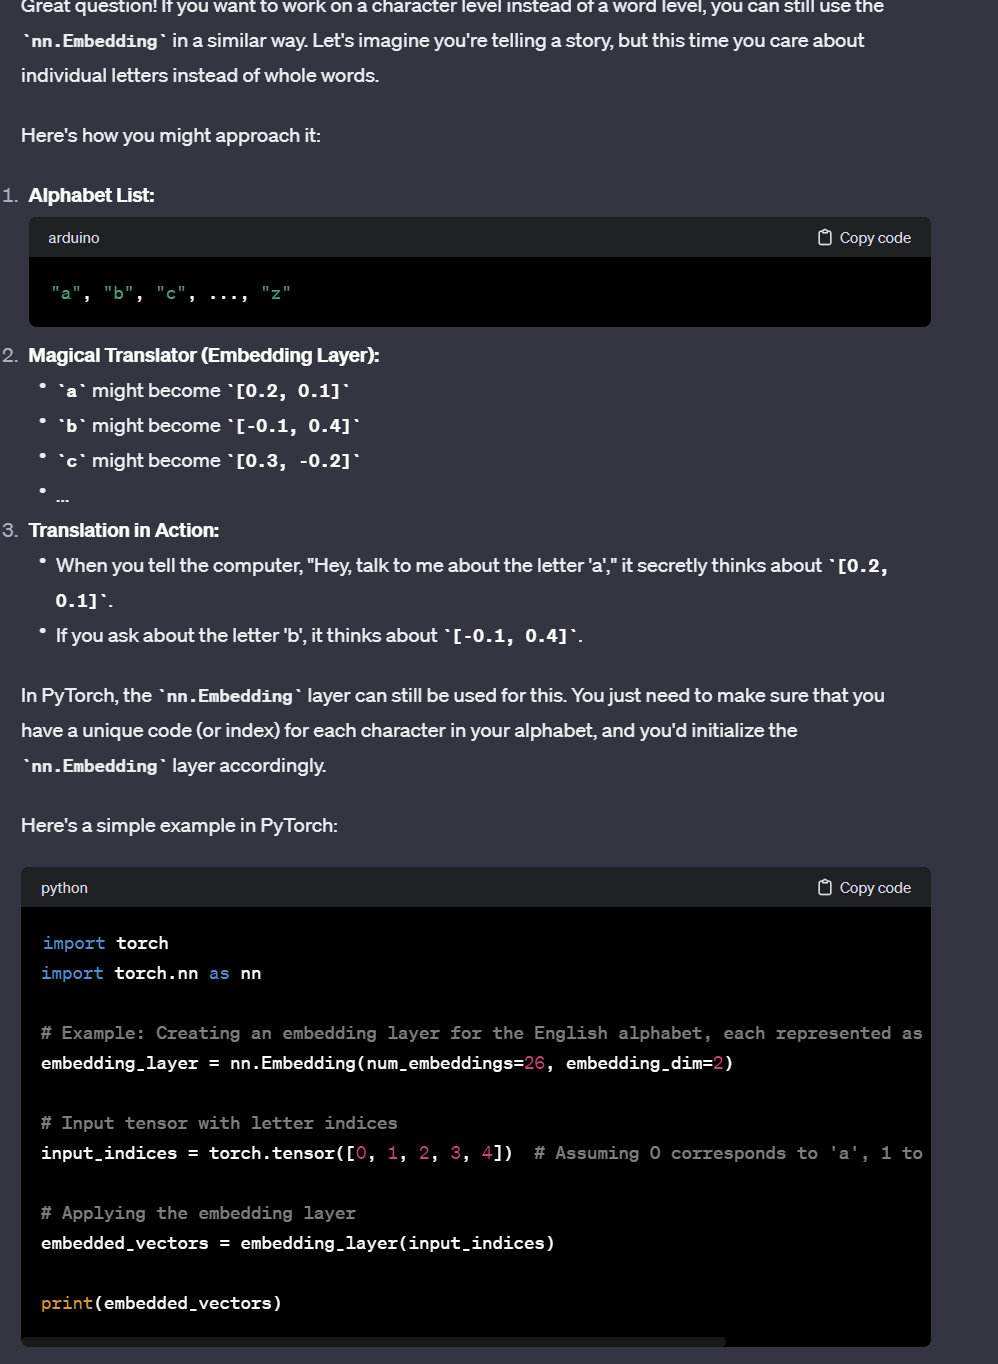

In [33]:
import torch
import torch.nn as nn

# Example: Creating an embedding layer for the English alphabet, each represented as a 2-dimensional vector.
embedding_layer = nn.Embedding(num_embeddings=26, embedding_dim=3)
print(embedding_layer)

# Input tensor with letter indices
input_indices = torch.tensor([0])  # Assuming 0 corresponds to 'a', 1 to 'b', and so on

# Applying the embedding layer
embedded_vectors = embedding_layer(input_indices)

print(embedded_vectors)


Embedding(26, 3)
tensor([[ 0.9992,  1.6903, -0.3694]], grad_fn=<EmbeddingBackward0>)


In [34]:
vocab_size = 3

token_embedding_table = nn.Embedding(vocab_size, vocab_size)
print('token_embedding_table:',token_embedding_table)

context = torch.zeros((1,1), dtype=torch.long)
print('context:',context)

logits = token_embedding_table(context)
print('logits:', logits)

B, T, C = logits.shape
logits = logits.view(B*T, C)
print('logits2:', logits)


token_embedding_table: Embedding(3, 3)
context: tensor([[0]])
logits: tensor([[[ 0.7204, -1.9692, -0.1270]]], grad_fn=<EmbeddingBackward0>)
logits2: tensor([[ 0.7204, -1.9692, -0.1270]], grad_fn=<ViewBackward0>)


In [35]:
a = torch.tensor([1,2])
b = torch.tensor([7,10])
print(torch.dot(a, b))

tensor(27)


In [36]:
a = torch.tensor([[1,2],[3,4],[5,6]])
b = torch.tensor([[7,8,9],[10,11,12]])
print(a @ b)
print(torch.matmul(a,b))

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])
tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


In [76]:
int_64 = torch.randint(2, (3,2)).float()
print(int_64)

float_32 = torch.rand(2,3)
print(float_32)
print(int_64.dtype, float_32.dtype)
result = torch.matmul(int_64, float_32)
print(result)

tensor([[0., 1.],
        [1., 1.],
        [0., 0.]])
tensor([[0.6362, 0.3467, 0.8264],
        [0.8275, 0.7034, 0.3611]])
torch.float32 torch.float32
tensor([[0.8275, 0.7034, 0.3611],
        [1.4637, 1.0501, 1.1875],
        [0.0000, 0.0000, 0.0000]])


In [38]:
a = torch.rand(2, 3, 5)
print(a)
x, y ,z = a.shape
print(x)
print(y)
print(z)
a = a.view(x,y,z)
print(a)
print(a.shape)
b = a.view(x*y, z)
print(b)

tensor([[[0.0082, 0.5097, 0.7802, 0.0894, 0.8976],
         [0.0481, 0.2310, 0.2117, 0.4212, 0.3662],
         [0.6579, 0.9962, 0.4055, 0.6112, 0.9860]],

        [[0.3012, 0.8109, 0.7896, 0.0920, 0.8591],
         [0.0919, 0.7890, 0.1243, 0.0103, 0.0609],
         [0.4147, 0.0621, 0.3444, 0.9523, 0.4122]]])
2
3
5
tensor([[[0.0082, 0.5097, 0.7802, 0.0894, 0.8976],
         [0.0481, 0.2310, 0.2117, 0.4212, 0.3662],
         [0.6579, 0.9962, 0.4055, 0.6112, 0.9860]],

        [[0.3012, 0.8109, 0.7896, 0.0920, 0.8591],
         [0.0919, 0.7890, 0.1243, 0.0103, 0.0609],
         [0.4147, 0.0621, 0.3444, 0.9523, 0.4122]]])
torch.Size([2, 3, 5])
tensor([[0.0082, 0.5097, 0.7802, 0.0894, 0.8976],
        [0.0481, 0.2310, 0.2117, 0.4212, 0.3662],
        [0.6579, 0.9962, 0.4055, 0.6112, 0.9860],
        [0.3012, 0.8109, 0.7896, 0.0920, 0.8591],
        [0.0919, 0.7890, 0.1243, 0.0103, 0.0609],
        [0.4147, 0.0621, 0.3444, 0.9523, 0.4122]])


In [39]:
tensor = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]],[[20,21,22],[23,24,25],[26,27,28]]])
print(tensor)
tensor = tensor[:,:, 0]
print(tensor)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[20, 21, 22],
         [23, 24, 25],
         [26, 27, 28]]])
tensor([[ 1,  4,  7],
        [10, 13, 16],
        [20, 23, 26]])


In [40]:
import torch.nn.functional as F

# Your original numbers
original_numbers = torch.tensor([2.0, 1.0, 3.0])

# Apply softmax function
probabilities = F.softmax(original_numbers, dim=0)

print(probabilities)

tensor([0.2447, 0.0900, 0.6652])
